[View in Colaboratory](https://colab.research.google.com/github/jesandovala/Project-Final-Classification-Images/blob/master/MOVIES_FPROJECT_V3.ipynb)

####Created by Aleksey Sepúlveda Durán & Jose Eduardo Sandoval Alba

In [1]:
from keras import backend as K
K.clear_session()

Using TensorFlow backend.


### Import Modules

In [2]:

!pip install tqdm
!pip install livelossplot
!pip install -U -q PyDrive
!pip install pprint

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import keras.optimizers as krsopt

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tqdm import tqdm
from zipfile import *
from livelossplot import PlotLossesKeras
from pprint import pprint



%matplotlib inline

    100% |████████████████████████████████| 51kB 2.4MB/s 
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Running setup.py bdist_wheel for livelossplot ... - \ done
  Stored in directory: /content/.cache/pip/wheels/67/8b/e9/3990164e3b2a421145b9d9d76fc8aa889225d495b043faeb73
Successfully built livelossplot
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Running setup.py bdist_wheel for pprint ... - done
  Stored in directory: /content/.cache/pip/wheels/42/d4/c6/16a6495aecc1bda5d5857bd036efd50617789ba9bea4a05124


Successfully built pprint
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
dataTesting = pd.read_csv(os.path.join('https://github.com/jesandovala/Project-Final-Classification-Images/raw/master/dataTesting.csv'), encoding='UTF-8', index_col=0)
dataTraining = pd.read_csv(os.path.join('https://github.com/jesandovala/Project-Final-Classification-Images/raw/master/dataTraining.csv'), encoding='UTF-8', index_col=0)

dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


In [0]:
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1cFX4osUZTu-SSa8gHh8kRA00L3eQwWnI'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])

In [0]:
!unzip images_resize_gray.zip> /dev/null

In [7]:
!ls

datalab  images_resize_gray  images_resize_gray.zip


In [0]:
from skimage import io
image = io.imread(os.path.join( 'images_resize_gray', str(dataTraining.index[110]) + '_resize_gray.jpeg'))

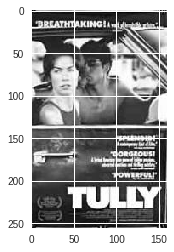

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(image, cmap='gray')

In [10]:

images_training = []
for i in tqdm(dataTraining.index):
    images_training.append(io.imread(os.path.join('images_resize_gray', str(i) + '_resize_gray.jpeg')))



100%|██████████| 7895/7895 [00:04<00:00, 1631.90it/s]


In [11]:
images_training = np.stack(images_training)

images_training.shape, dataTraining.shape[0]

((7895, 256, 160), 7895)

In [12]:
images_testing = []
for i in tqdm(dataTesting.index):
    images_testing.append(io.imread(os.path.join( 'images_resize_gray', str(i) + '_resize_gray.jpeg')))

images_testing = np.stack(images_testing)

images_testing.shape, dataTesting.shape[0]

100%|██████████| 3383/3383 [00:01<00:00, 1723.06it/s]


((3383, 256, 160), 3383)

In [0]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))

le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [0]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(images_training, y_genres, test_size=0.3, random_state=110)

In [15]:
X_test.shape

(2369, 256, 160)

In [16]:
y_test_genres.shape

(2369, 24)

# CNN

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv1D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator


outputClasses = 24

model = Sequential()
model.add(Conv1D(32,32, input_shape=(256,160)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv1D(32, 32))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv1D(64,32))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv1D(64,32))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Flatten())

# Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(outputClasses))

model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 225, 32)           163872    
_________________________________________________________________
batch_normalization_1 (Batch (None, 225, 32)           128       
_________________________________________________________________
activation_1 (Activation)    (None, 225, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 194, 32)           32800     
_________________________________________________________________
batch_normalization_2 (Batch (None, 194, 32)           128       
_________________________________________________________________
activation_2 (Activation)    (None, 194, 32)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 163, 64)           65600     
__________

In [0]:
from keras.optimizers import adam
from keras.optimizers import SGD
from keras.optimizers import adamax
from keras.optimizers import RMSprop
from livelossplot import PlotLossesKeras

#Defines optimizer.
op = SGD(lr=0.0001)

# Compile the neural network.
model.compile(loss='categorical_crossentropy',
             optimizer=op,
              metrics=['accuracy'])

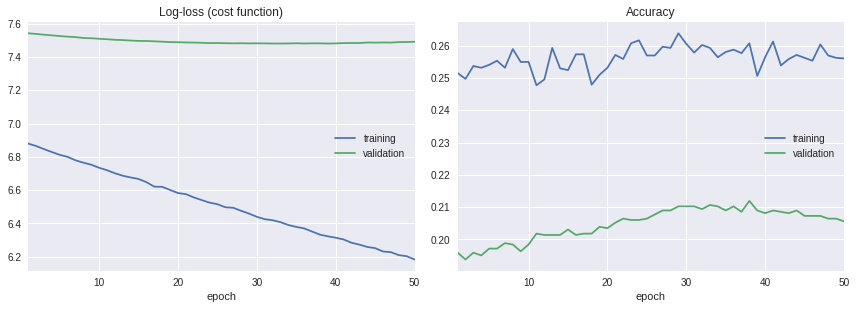

In [22]:
batch_size = 35
epochs = 50

trainingCNN = model.fit(X_train, y_train_genres,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    shuffle = False, 
                    validation_data = [X_test,y_test_genres],callbacks=[PlotLossesKeras()])

In [0]:
model1=model.predict(X_test)

In [0]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [0]:
auc = roc_auc_score(y_test_genres, model1, average="macro")

In [26]:
print(auc)

0.5833221489810257


#TRANSFER

In [27]:
from keras.applications import VGG16
from skimage.transform import resize

vgg16 = VGG16(include_top=False, weights='imagenet')

def apply_vgg_grayscale(images):

    images_ = []
    for img in tqdm(images):

        # reshape
        img = img.reshape((256, 160))

        # rescale
        img = resize(img, (160, 160), mode='reflect')

        # repeat
        img = [img] * 3

        images_.append(img)


    # To numpy array
    images_ = np.array(images_)

    # move channel to last axis
    images_ = np.rollaxis(images_, 1, 4)

    # Apply vgg
    images_vgg = vgg16.predict(images_)
    
    return images_vgg

images_training_vgg = apply_vgg_grayscale(images_training)
images_training_vgg.shape

images_testing_vgg = apply_vgg_grayscale(images_testing)
images_testing_vgg.shape

58892288/58889256 [==============================] - 2s 0us/step


100%|██████████| 3383/3383 [00:11<00:00, 296.44it/s]


(3383, 5, 5, 512)

In [0]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(images_training_vgg, y_genres, test_size=0.3, random_state=110)

In [29]:
X_test.shape

(2369, 5, 5, 512)

In [30]:
from keras.optimizers import RMSprop
vgg16 = Sequential()
vgg16.add(Flatten(input_shape=(5,5,512)))
vgg16.add(Dense(512, activation='sigmoid'))
vgg16.add(Dropout(0.5))
vgg16.add(Dense(24, activation='sigmoid'))
vgg16.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.0001), metrics=['accuracy'])
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               6554112   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                12312     
Total params: 6,566,424
Trainable params: 6,566,424
Non-trainable params: 0
_________________________________________________________________


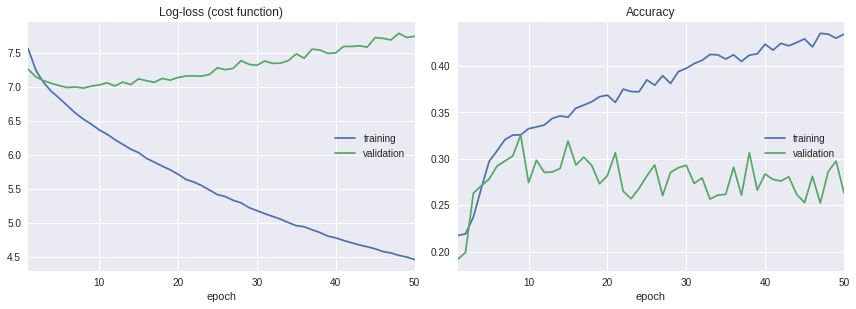

In [31]:
vgg16.fit(X_train, y_train_genres, validation_data=[X_test, y_test_genres], epochs=50, verbose=2, callbacks=[PlotLossesKeras()])

In [0]:
model2=vgg16.predict(X_test)

In [0]:
auc = roc_auc_score(y_test_genres, model2, average="macro")

In [34]:
print(auc)

0.6921254949418287


In [0]:
from google.colab import files


cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres = vgg16.predict(images_testing_vgg)

pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('pred_genres_img.csv', index_label='ID')

files.download('pred_genres_img.csv')

#  Text Classification

In [36]:
Xtraintext = dataTraining['plot']
Xtrainname = dataTraining['title']

Xtesttext = dataTesting['plot']
Xtestname = dataTesting['title']
Xtraintext.shape
dataTraining['genres'].shape

(7895,)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer(max_features=1000,ngram_range =(1,3),lowercase=True,stop_words='english')
X_dtm_text = vect.fit_transform(Xtraintext)
X_dtm_name = vect.fit_transform(Xtrainname)
Y_dtm_text = vect.fit_transform(Xtesttext)
Y_dtm_name = vect.fit_transform(Xtestname)

le = MultiLabelBinarizer()
y_genres_2 = le.fit_transform(dataTraining['genres'])

In [38]:
X_dtm_name.shape

(7895, 1000)

In [39]:
y_genres_2.shape

(7895, 24)

In [0]:
X_train_text, X_test_text, y_train_genres_text, y_test_genres_text = train_test_split(X_dtm_text, y_genres_2, test_size=0.3, random_state=110)
X_train_name, X_test_name, y_train_genres_name, y_test_genres_name = train_test_split(X_dtm_name, y_genres_2, test_size=0.3, random_state=110)

In [41]:
from keras.layers.recurrent import LSTM
model_text = Sequential()

model_text.add(Dense(128, input_shape=(1000,)))
model_text.add(Activation('tanh'))
model_text.add(BatchNormalization())
model_text.add(Dropout(0.5))

model_text.add(Dense(128))
model_text.add(Activation('softmax'))
model_text.add(BatchNormalization())
model_text.add(Dropout(0.5))

model_text.add(Dense(24))
model_text.add(Activation('sigmoid'))


model_text.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.0001), metrics=['accuracy'])
model_text.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               128128    
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
__________

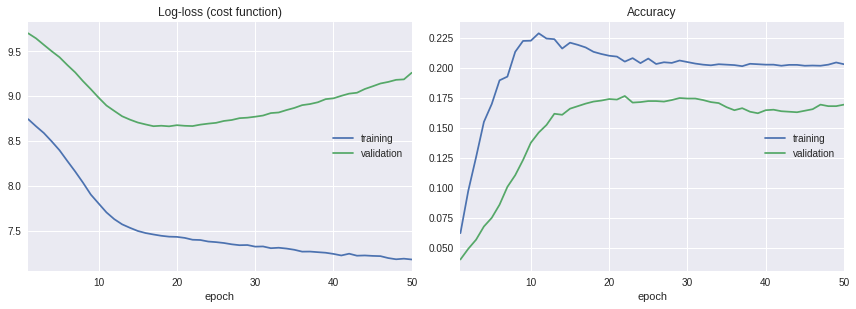

In [42]:
model_text.fit(X_train_name, y_train_genres_name, validation_data=[X_test_text, y_test_genres_text], epochs=50, verbose=2, callbacks=[PlotLossesKeras()])

In [0]:
model3=model_text.predict(X_test_name)

In [0]:
auc = roc_auc_score(y_test_genres_name, model3, average="macro")

In [45]:
print(auc)

0.5776483048891795


In [0]:
from google.colab import files


cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres = model_text.predict(Y_dtm_name)

pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('pred_genres_img.csv', index_label='ID')

files.download('pred_genres_img.csv')

# LSTM

In [0]:
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence


In [79]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
import keras
from keras import backend as K
print(K.tensorflow_backend._get_available_gpus())

['/job:localhost/replica:0/task:0/device:GPU:0']


In [0]:
X = dataTraining['plot'].tolist()

In [0]:
voc = set(''.join(X))
vocabulary = {x: idx + 1 for idx, x in enumerate(set(voc))}

In [0]:
# Max len
max_plot_len = 150
X = [x[:max_plot_len] for x in X]
# Convert characters to int and pad
X = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in X]

In [83]:
len(X)

7895

In [0]:
X_pad = sequence.pad_sequences(X, maxlen=max_plot_len)

In [85]:
  X_pad

array([[68, 26, 18, ..., 40, 40,  1],
       [ 0,  0,  0, ...,  6, 40, 66],
       [21, 13, 40, ..., 21,  4, 40],
       ...,
       [ 4, 21,  6, ..., 21, 13, 34],
       [68, 70, 18, ...,  7, 48, 31],
       [ 0,  0,  0, ..., 31, 40, 66]], dtype=int32)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_genres_2, test_size=0.33, random_state=42)

In [87]:
model_text_2 = Sequential()
model_text_2.add(Embedding(len(vocabulary) + 1, 128, input_length=max_plot_len))
model_text_2.add(LSTM(32))
model_text_2.add(Dropout(0.5))
model_text_2.add(Dense(24, activation='sigmoid'))
model_text_2.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.0001), metrics=['accuracy'])

model_text_2.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 150, 128)          9600      
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 24)                792       
Total params: 31,000
Trainable params: 31,000
Non-trainable params: 0
_________________________________________________________________


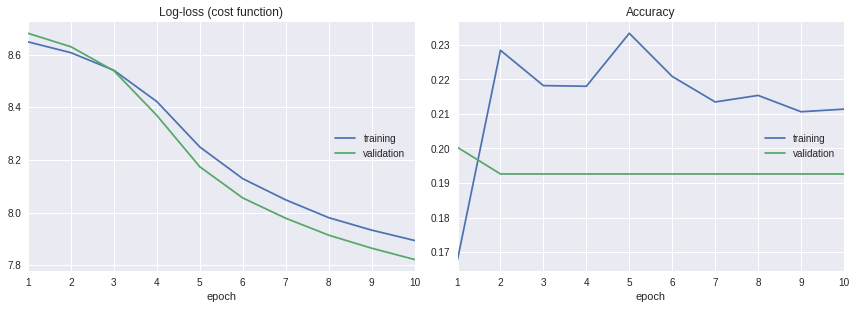

In [88]:
model_text_2.fit(X_train, y_train, validation_data=[X_test, y_test], 
          batch_size=128, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

In [0]:
model4=model_text_2.predict(X_test)

In [92]:
auc = roc_auc_score(y_test, model4, average="macro")
print(auc)

0.499918131627509


## Model 5 Text

In [65]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
model_text_3 = Sequential()
model_text_3.add(Embedding(len(vocabulary) + 1, 128, input_length=max_plot_len))
model_text_3.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_text_3.add(Dropout(0.5))
model_text_3.add(MaxPooling1D(pool_size=2))
model_text_3.add(LSTM(100))
model_text_3.add(Dense(24, activation='sigmoid'))
model_text_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_text_3.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 150, 128)          9600      
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 150, 32)           12320     
_________________________________________________________________
dropout_6 (Dropout)          (None, 150, 32)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 75, 32)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_10 (Dense)             (None, 24)                2424      
Total params: 77,544
Trainable params: 77,544
Non-trainable params: 0
_________________________________________________________________
None


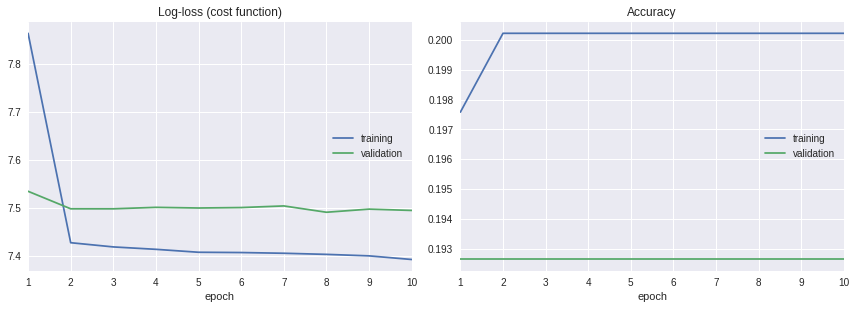

In [66]:
model_text_3.fit(X_train, y_train, validation_data=[X_test, y_test], 
          batch_size=128, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

In [70]:
auc = roc_auc_score(y_test, model5, average="macro")
print(auc)

0.5008579926977358


##### Stacking

In [93]:
y_pred_test_genres.shape


(3383, 24)

In [144]:
y_pred_test_genres[1,1]

0.0026529268

In [0]:
Y = dataTesting['plot'].tolist()

voc1 = set(''.join(Y))
vocabulary1 = {x: idx + 1 for idx, x in enumerate(set(voc1))}

# Max len
max_plot_len = 150
Y = [x[:max_plot_len] for x in Y]
# Convert characters to int and pad
Y = [[vocabulary1[x1] for x1 in x if x1 in vocabulary1.keys()] for x in Y]

len(Y)

Y_pad = sequence.pad_sequences(Y, maxlen=max_plot_len)


In [143]:
Y_pad.shape

(3383, 150)

In [0]:
numpy.random.seed(110)
y_pred_test_genres_text=model_text_2.predict(Y_pad)

In [145]:
y_pred_test_genres_text[1,1]

0.65275365

In [103]:
y_pred_test_genres_text.shape

(3383, 24)

In [115]:
X =y_pred_test_genres_text
Y = y_pred_test_genres
len(X[0])

24

In [110]:
result = np.zeros((3383,24))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
result = [[(X[i][j] + Y[i][j])/2  for j in range(len(X[0]))] for i in range(len(X))]
   

In [0]:
from google.colab import files


cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

pd.DataFrame(result, index=dataTesting.index, columns=cols).to_csv('pred_combine_img.csv', index_label='ID')

files.download('pred_combine_img.csv')